<a href="https://colab.research.google.com/github/AlexUrtubia/Game_of_thrones_deaths/blob/main/Ej_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio de visualización de datos**
Se solicita trabajar con algún dataset de https://www.makeovermonday.co.uk/ para crear visualizaciones respecto a este.
Tanto el dataset como las visualizaciones a crear son a elección del estudiante

Se ha seleccionado el siguiente dataset: 
https://data.world/makeovermonday/2019w27/workspace/file?filename=game-of-thones-deaths.xlsx
El cual contiene la información respecto a todas las muertes ocurridas en la famosa serie Game Of Thrones a lo largo de todas sus temporadas y capítulos.

# Creando el dataframe

En primer lugar es necesario crear el dataframe original, a partir de algún archivo externo que necesite ser cargado a google colab para trabajar sobre este

In [2]:
# Se importan las librerías que nos serán de utilidad para realizar este proyecto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Es importante comprobar que contemos con la versión más reciente de la librería 'matplotlib', ya que algunas de las tareas a realizar en las visualizaciones
# no se podrán realizar si se trabaja con la versión por defecto que trae google colab 

#Es posible comprobar la versión instalada con la librería pkg_resources
import pkg_resources
print(pkg_resources.get_distribution('matplotlib').version)

In [4]:
# Al sintonizar google drive con google colab, es posible trabajar con archivos que hayamos subido a nuestro espacio en la nube

# Se indica la ruta del archivo que se necesite utilizar como base del dataframe como argumento en la función read_excel de pandas
# y se crea de esta manera un 'df' que contendrá a modo de dataFrame los datos de este archivo xlsx 
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/Archivos/game-of-thones-deaths.xlsx', skiprows=1)
df.head()

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,2,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,None,4,1,Direwolf,None,Winterfell,Teeth,Stag,1
4,None,5,1,Stag,None,Winterfell,Antler,Direwolf,1


In [5]:
# 'info' proporciona información importante acerca del df, tal como cantidad de elementos, filas, columnas, 
# sus nombres, el tipo de variable que guarda cada columna y la cantidad de datos no-nulos de cada una
df.info()
# Es posible observar que para este archivo no existen valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Allegiance     2224 non-null   object
 1   Death No.      2224 non-null   int64 
 2   Episode        2224 non-null   int64 
 3   Killer         2224 non-null   object
 4   Killers House  2224 non-null   object
 5   Location       2224 non-null   object
 6   Method         2224 non-null   object
 7   Name           2224 non-null   object
 8   Season         2224 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 156.5+ KB


In [6]:
# Describe proporciona datos estadísticos del df, tales como media, desvíación estándar, cuartiles, mínimo, máximo, etc. de cada columna
df.describe()
# De manera preliminar, pareciera que no existen datos con valores atípicos

,Death No.,Episode,Season
count,2224.000000,2224.000000,2224.000000
mean,1112.500000,5.959982,6.248201
std,642.157821,2.503927,2.001685
min,1.000000,1.000000,1.000000
25%,556.750000,5.000000,5.000000
50%,1112.500000,5.000000,7.000000
75%,1668.250000,9.000000,8.000000
max,2224.000000,10.000000,8.000000


In [220]:
# Cada quien decide como se le hace más fácil el trabajo, por lo que se decide cambiar el orden de las columnas para tener una mejor apreciación de los datos
df = df[['Death No.',	'Killer', 'Killers House', 'Location', 'Method', 'Name', 'Allegiance', 'Episode', 'Season']]
df

,Death No.,Killer,Killers House,Location,Method,Name,Allegiance,Episode,Season
0,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,Night's Watch,1,1
1,2,White Walker,None,Beyond the Wall,Ice sword,Gared,Night's Watch,1,1
2,3,Ned Stark,House Stark,Winterfell,Sword,Will,Night's Watch,1,1
3,4,Direwolf,None,Winterfell,Teeth,Stag,None,1,1
4,5,Stag,None,Winterfell,Antler,Direwolf,None,1,1
...,...,...,...,...,...,...,...,...,...
2219,2207,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,None,5,8
2220,2208,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,None,5,8
2221,2209,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,None,5,8
2222,2210,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,None,5,8


# Gráfico 1

¿Quienes fueron los 10 personajes que más asesinatos cometieron?

In [361]:
# Para determinar cuáles personajes están en la lista de asesinos, y a cuantos asesinaron, se consulta con 'value_counts' por el detalle de esta información
ks = df['Killer'].value_counts()
# Esta nos muestra el total de personajes y la suma de sus eliminaciones, pero para trabajar con un rango de datos menor, se seleccionan aquellos que se encuentran en el top 10
# Esto se hace añadiendo 'nlargest(10)' que retornará los 10 primeros valores ordenados de manera descendiente
# Se guarda en una serie de pandas llamada ks10
ks10 = ks.nlargest(10)

pandas.core.series.Series

Generando el gráfico

Text(0.5, 0, 'Cantidad de muertes')

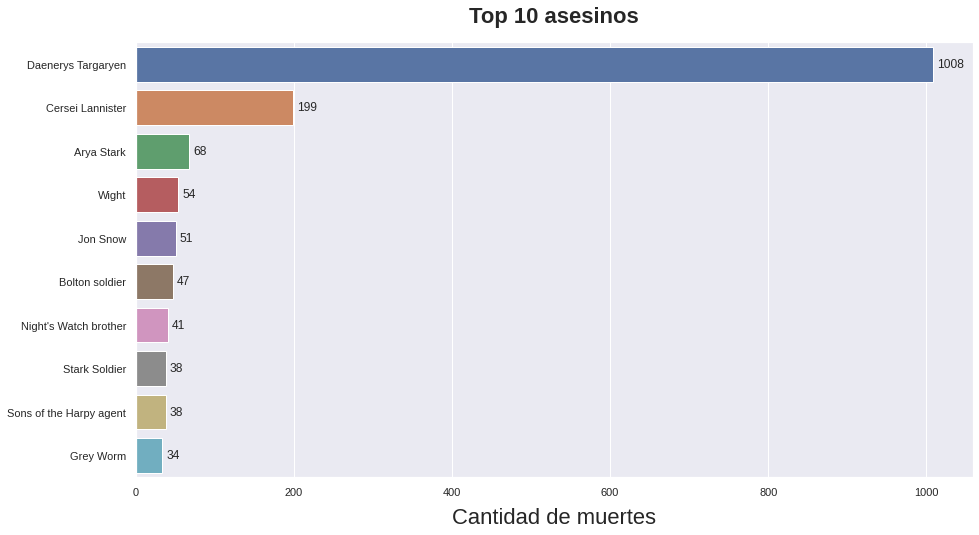

In [310]:
# Desde seaborn se establecen parámetros tales como el estilo del gráfico y las dimensiones del mismo con .set()
sns.set(style='darkgrid', rc = {'figure.figsize':(15,8)})

# Se define un gráfico de barras con los datos de ks10, para el eje horizontal, se encuentran sus valores, o la cantidad de muertes 
# y para el eje vertical el índice de ks10, o los nombres de cada personaje de la lista
ax = sns.barplot(y=ks10.index, x=ks10.values)

# Para visualizar los elementos del gráfico con mejor detalle, se incorporan los valores del total de asesinatos de cada personaje
# Para esto, se utiliza bar_label con containers como argumento, que permite además personalizar parámetros del texto e cuestión
ax.bar_label(ax.containers[0], fontsize=12, padding=4)
# Se definen el título y el label para el eje x
ax.set_title("Top 10 asesinos", {'fontsize': 22, 'fontweight':"bold"}, pad=20)
ax.set_xlabel("Cantidad de muertes", fontsize= 22, labelpad=10)

# Gráfico 2

¿Cuántas muertes ocurrieron por temporada?

In [365]:
# Para graficar la cantidad de muertes por temporada, una buena alternativa es agrupar los datos del dataframe por temporada, 
# y mostrarlos por el conteo total de muertes ocurridas 
seas = df.groupby(['Season'])[['Death No.']].count()
seas

,Death No.
Season,
1,58
2,130
3,86
4,170
5,158
6,396
7,334
8,892


Text(0, 0.5, 'Cantidad de muertes')

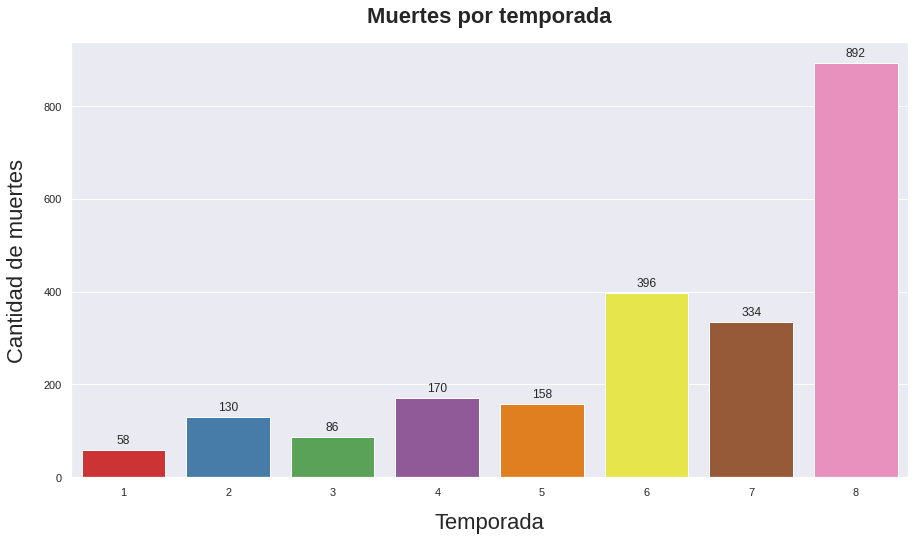

In [366]:
# Se plotea un gráfico de barras utilizando seaborn, para el eje x, se utilizan los valores únicos de la columna season

# mientras que para el eje y, se utilza el conteo realizado en el df de la agrupación seas
ax = sns.barplot(x = df['Season'].unique(), y = seas['Death No.'],palette="Set1")
# Al igual que en el caso anterior, resulta mucho más eficiente acompañar con los valores acumulados por cada temporada
ax.bar_label(ax.containers[0], fontsize=12, padding=4)

# Se define el titulo y los nombres de cada eje con sus respectivos parámetros
ax.set_title("Muertes por temporada", {'fontsize': 22, 'fontweight':"bold"}, pad=20)
ax.set_xlabel("Temporada", fontsize= 22, labelpad=15)
ax.set_ylabel("Cantidad de muertes", fontsize= 22, labelpad=15)

# Gráfico 3

Mostrar con subplots todas las muertes ocurridas por temporada y capitulo

In [155]:
# Al igual que en el caso anterior, es necesario agrupar el conteo de las muertes pero esta vez por temporada y por capítulo
ep_se = df.groupby(['Season', 'Episode'])['Death No.'].count()
# Se guarda en una serie de pandas con dos índices para una mejor manipulación de los datos
ep_se

Season  Episode
1       1            7
        2            3
        4            1
        5           17
        6            5
                  ... 
8       2            1
        3           35
        4            5
        5          844
        6            1
Name: Death No., Length: 69, dtype: int64

In [367]:
# De manera de facilitar el llamado de cada dato en el ploteo del gráfico, se crean dos listas con listas en su interior con los capitulos por temporada
# y la cantidad de muertes por caítulo
caps = []
deaths = []

# Con un for, se itera 8 veces añadiendo los valores de cada lista a cap y deaths
for i in range (1,9):
  
  # Con los datos agrupados en donde el valor de temporada es igual a i, se guarda el valor de cada episodio en una lista que a su vez se añade a cap 
  cap = ep_se[ep_se.index.get_level_values('Season')==i].index.get_level_values('Episode').tolist()
  caps.append(cap)

  # Y al igual que con el caso anterior, esta vez se guardan los valores (la cantidad de muertes totales por capitulo) en una lista que con append se añade a la lista deaths
  de = ep_se[ep_se.index.get_level_values('Season')==i].values.tolist()
  deaths.append(de)

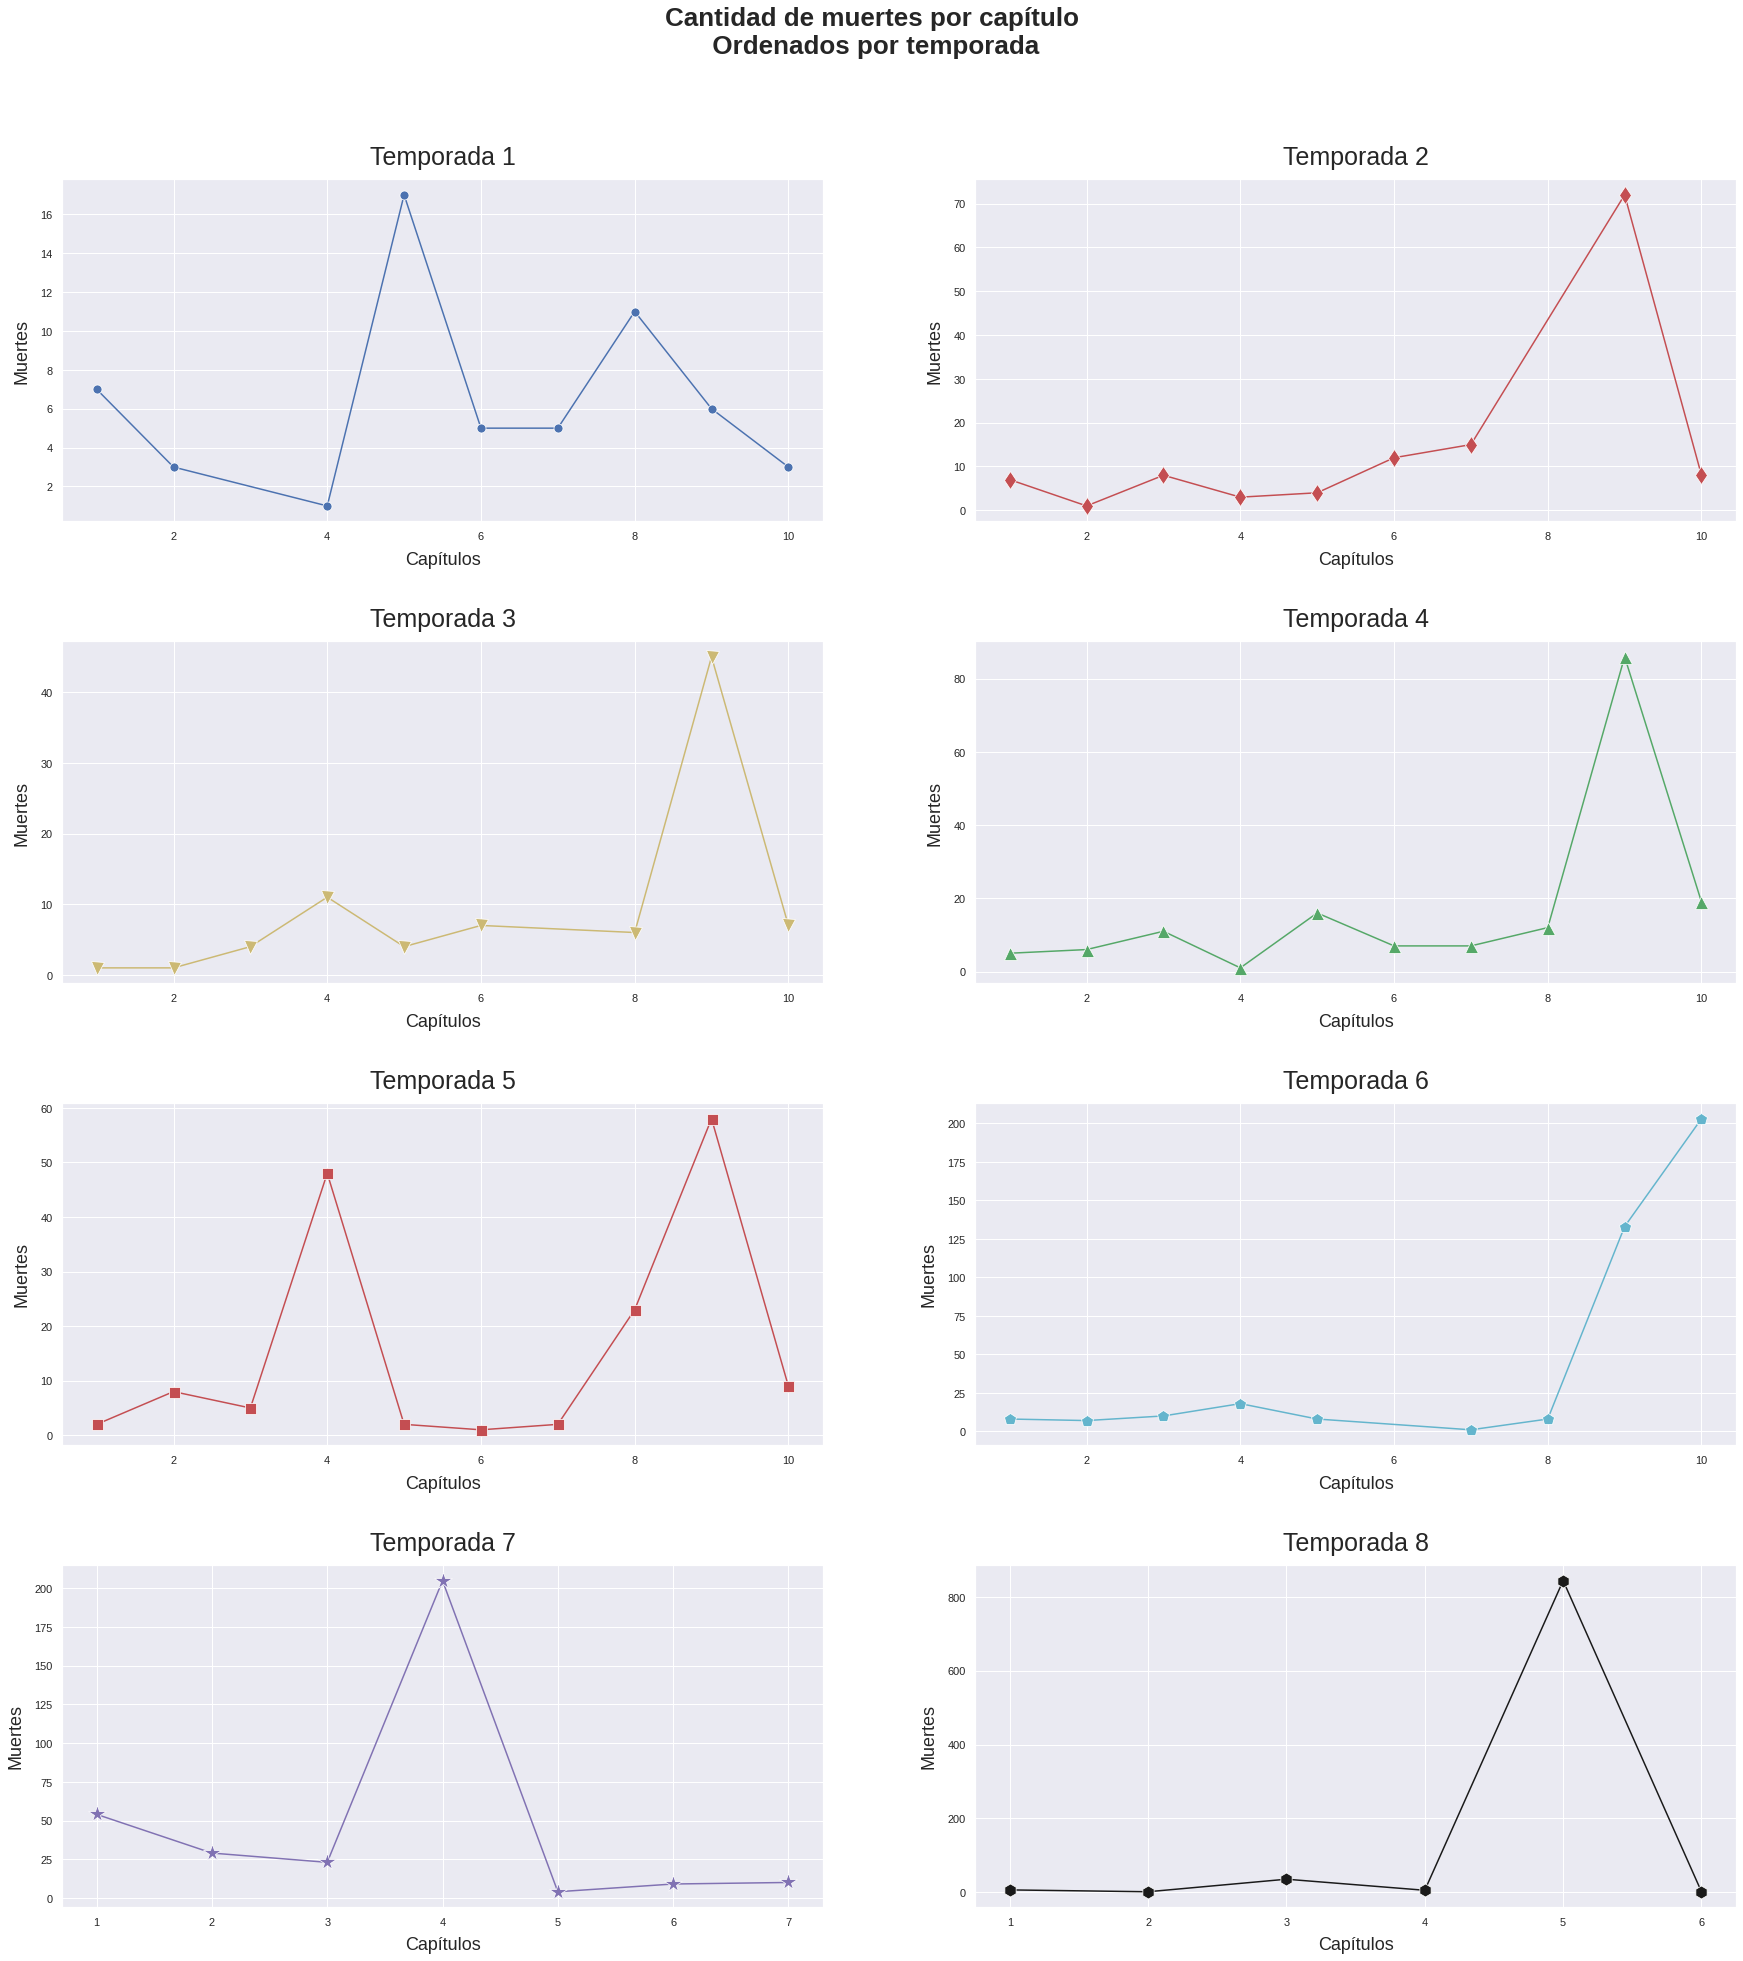

In [375]:
# Se crea una figura de 8 ejes dispuesta en 4 filas y dos columnas de tamaño 30x30 con su respectivo título

fig, axes = plt.subplots(4, 2, figsize=(30,30))
fig.suptitle('Cantidad de muertes por capítulo\n Ordenados por temporada', fontsize=26, fontweight='bold')


#Se plotea con lineplot los capitulos y cantidad de muertes en los ejes x e y, con sus respectivos parámetros de color y marcadores
sns.lineplot(x=caps[0], y=deaths[0], ax=axes[0,0], marker='.', ms=18)
sns.lineplot(x=caps[1], y=deaths[1], ax=axes[0,1], marker='d', ms=13, color='r')
sns.lineplot(x=caps[2], y=deaths[2], ax=axes[1,0], marker='v', ms=13, color='y')
sns.lineplot(x=caps[3], y=deaths[3], ax=axes[1,1], marker='^', ms=13, color='g')
sns.lineplot(x=caps[4], y=deaths[4], ax=axes[2,0], marker='s', ms=11, color='r')
sns.lineplot(x=caps[5], y=deaths[5], ax=axes[2,1], marker='p', ms=13, color='c')
sns.lineplot(x=caps[6], y=deaths[6], ax=axes[3,0], marker='*', ms=18, color='m')
sns.lineplot(x=caps[7], y=deaths[7], ax=axes[3,1], marker='h', ms=13, color='k')

# Se aladen los respectivos títulos, y labels para los ejes

axes[0, 0].set_title("Temporada 1", fontsize=25, pad=15)
axes[0, 1].set_title("Temporada 2", fontsize=25, pad=15)
axes[1, 0].set_title("Temporada 3", fontsize=25, pad=15)
axes[1, 1].set_title("Temporada 4", fontsize=25, pad=15)
axes[2, 0].set_title("Temporada 5", fontsize=25, pad=15)
axes[2, 1].set_title("Temporada 6", fontsize=25, pad=15)
axes[3, 0].set_title("Temporada 7", fontsize=25, pad=15)
axes[3, 1].set_title("Temporada 8", fontsize=25, pad=15)


for j in range (0,4):
  for k in range (0,2):
    axes[j,k].set_xlabel("Capítulos", fontsize=18, labelpad=10)
    axes[j,k].set_ylabel("Muertes", fontsize=18, labelpad=10)

# Se añade también 'subplots_adjust' que permite ajustar las distancias entre cada plot para que se vea más ordenado cada gráfico
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)


# Gráfico 4

¿Qué casas acumulan más asesinatos?
¿Cuáles sufrieron mayores bajas?
Mostrar un top 10 de ambos casos

In [221]:
# Para conocer estos datos, vamos a aplicar un value_counts sobre cada columna para determinar las cantidades totales por cada casa
df['Killers House'].value_counts()

House Targaryen                      1148
House Lannister                       296
House Stark                           184
White Walkers                          79
House Bolton                           76
Night's Watch                          69
Free Folk                              62
House Greyjoy                          44
Sons of the Harpy                      38
House Baratheon of King's Landing      34
House Baratheon of Dragonstone         32
None                                   30
House Frey                             30
House Clegane                          23
House Tarth                            14
Warlocks of Qarth                      11
Lord of Light                           7
House Umber                             7
House Martell                           5
House Tyrell                            5
House Arryn                             5
Dothraki                                4
Sand Snakes                             3
The Masters                       

In [226]:
df['Allegiance'].value_counts()

House Lannister                      835
None                                 432
House Stark                          121
Free Folk                            121
Night's Watch                         79
House Bolton                          68
Sons of the Harpy                     68
House Targaryen                       68
House Baratheon of Dragonstone        67
House Frey                            62
Faith Militant                        52
Smallfolk                             44
House Greyjoy                         41
Dothraki                              23
House Baratheon of King's Landing     22
The Masters                           14
The Thirteen                          12
Wise Masters                          12
Brotherhood Without Banners           10
House Mormont                          8
House Martell                          8
Good Masters                           7
House Baelish                          6
Great Masters                          6
Children of the 

In [225]:
# En ambos casos, vemos que aparece el valor 'none', pero no nos aporta mayor información, pues estos personajes no representan a ninguna casa
# Se decide entonces eliminarlos del dt original aplicando filtros 
filter1 = df['Allegiance'] == 'None'
filter2 = df['Killers House'] == 'None'
df_not_none = df[~filter1 & ~filter2]
df_not_none

,Death No.,Killer,Killers House,Location,Method,Name,Allegiance,Episode,Season
2,3,Ned Stark,House Stark,Winterfell,Sword,Will,Night's Watch,1,1
5,6,Lysa Arryn,House Arryn,King's Landing,Poison,Jon Arryn,House Arryn,1,1
6,7,Dothraki man,Dothraki,Pentos,Arakh,Dothraki man,Dothraki,1,1
8,9,"Sandor ""the Hound"" Clegane",House Lannister,Kingsroad,Sword,Mycah,Smallfolk,2,1
9,10,Ned Stark,House Stark,Kingsroad,Knife,Lady,House Stark,2,1
...,...,...,...,...,...,...,...,...,...
1992,2052,Grey Worm,House Targaryen,King's Landing,Spear,Lannister soldier,House Lannister,5,8
1993,2053,Grey Worm,House Targaryen,King's Landing,Spear,Lannister soldier,House Lannister,5,8
1994,2140,Unsullied,House Targaryen,King's Landing,Spear,Lannister soldier,House Lannister,5,8
1995,1380,Daenerys Targaryen,House Targaryen,Dragonstone,Dragonfire (Dragon),Varys,House Targaryen,5,8


In [292]:
# Nuevamente se utiliza nlargest para encontrar el top10 de cada caso desde el df filtrado
kls = df_not_none['Killers House'].value_counts().nlargest(10)
dth = df_not_none['Allegiance'].value_counts().nlargest(10)

# Y se guarda la suma total de asesinatos y bajas en variables para utilizarlas más adelante en el ploteo
total1 = sum(kls.values)
total2 = sum(dth.values)

# Se eligen además desde seaborn paletas de colores con un rango de valores según la cantidad de porciones del gráfico
colors = sns.color_palette('deep')[0:len(kls)]
colors2 = sns.color_palette("tab10")[0:len(dth)]

([<matplotlib.patches.Wedge at 0x7f1a9ecdc310>,
 [Text(-1.1371974619098446, -0.17111964418443631, 'House Lannister'),
  Text(0.5653002887869498, -0.9436289437577629, 'House Stark'),
  Text(0.9359748248018438, -0.5778850468191384, 'Free Folk'),
  Text(1.0856478793293842, -0.1771120608756244, "Night's Watch"),
  Text(1.0903037836151064, 0.14573146343389, 'House Bolton'),
  Text(1.0084018410064295, 0.4394607229944949, 'Sons of the Harpy'),
  Text(0.850446335921689, 0.6976682805727763, 'House Targaryen'),
  Text(0.6280951155462949, 0.9030484626125481, 'House Baratheon of Dragonstone'),
  Text(0.36887824179348355, 1.0363053810201646, 'House Frey'),
  Text(0.11761036501273686, 1.0936945652427696, 'Faith Militant')],
 [Text(-0.6427637828186077, -0.09671979888685528, '835'),
  Text(0.30834561206560895, -0.5147066965951433, '117'),
  Text(0.5105317226191874, -0.3152100255377119, '115'),
  Text(0.5921715705433005, -0.09660657865943148, '75'),
  Text(0.5947111546991489, 0.07948988914575818, '68')

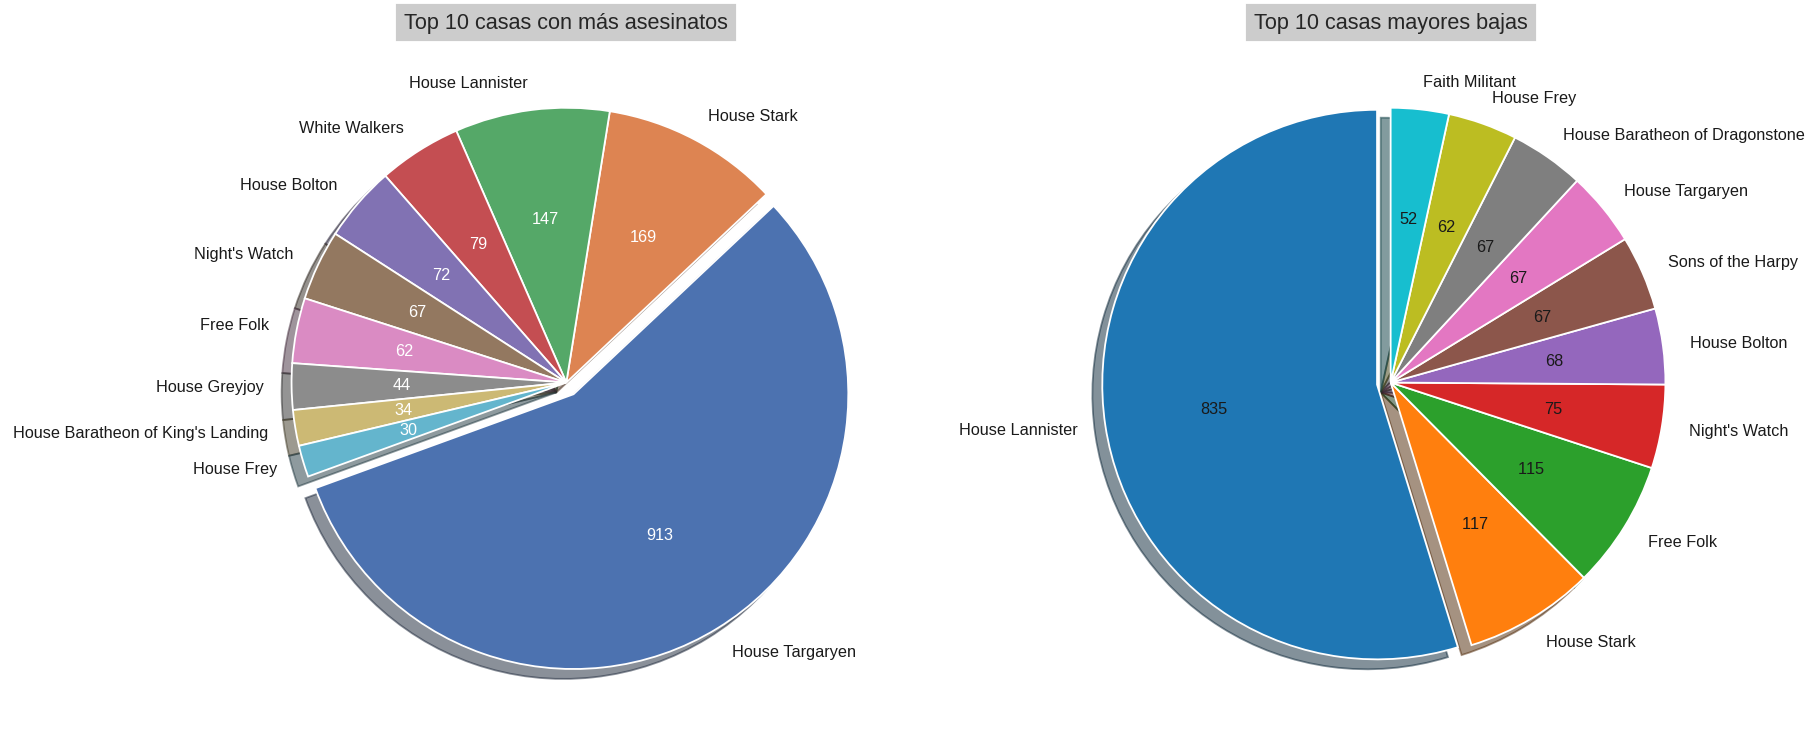

In [376]:
# La mejor alternativa graficar esto es mediante un gráfico de torta o pie

# se crea una figura con un dpi de 130, cabe mencionar el hecho de que si hay subplots, al cambiar el tamaño del dpi, estos podrían visualizarse mejor
fig1 = plt.figure(dpi=130)
# Se añade un subplot de una fila dos columnas, este subplot es el primero de la fila
ax1 = fig1.add_subplot(1,2,1) #1ra fila, 1ra columna, gráfico 1.
# Se añade un título que estará contenido dentro de un box
plt.title("Top 10 casas con más asesinatos", bbox={'facecolor':'0.8', 'pad':5})
wedges, text, autotext = ax1.pie(
      kls, # Los elementos a graficar, en este caso los valores de kls
      labels = kls.index, # Con los índices de kls como labels que corresponde a los nombres de cada casa 
      colors = colors, # Y los colores a utilizar seleccionados en las paletas de colores 
      autopct = lambda p: '{:.0f}'.format(p * total1 / 100), # Los valores de los labels internos seutiliza lambda con una función que retorne un valor absoluto y no un porcentaje,
                                                              # En este caso corresponde al total de muertes dividida entre 100
      explode=[0.05,0,0,0,0,0,0,0,0,0], # explode separa una o todas las porciones del gráfico a cierta distancia indicada en la lista respectivamente
      textprops={'color':"k", 'fontsize':'9'}, # Los colores de los labels
      shadow=True,# Se activa el sombreado
      startangle=200) # Y se rota el gráfico

# setp (set parameters) de pyplot, otorga la facultad de ajustar parametros de los elementos del return de ax.pie
# Estos elementos son wedges, text, autotext, los parámetros internos del gráfico, los textos de por ejemplo los labels,
# y las caracteristicas de los textos automáticos (los de autopct) respectivamente
# Para aplicar alguna modificación es necesario mencionarlos antes de 'ax.pie'
plt.setp(autotext, color='w', fontsize = 9)
# En este caso se indica cambiar el color de los labels internos a blanco


# La segunda figura de los subplots con sus respectivos parámetros, casi identicos a los del gráfico anterior, variando solamente en los datos a graficar
ax2 = fig1.add_subplot(1,2,2) #1ea fila, 2da columna, gráfico 2.
plt.title("Top 10 casas mayores bajas", bbox={'facecolor':'0.8', 'pad':5})
ax2.pie(
      dth,
      labels = dth.index, 
      colors = colors2,  
      autopct = lambda p: '{:.0f}'.format(p * total2 / 100), 
      explode=[0.05,0,0,0,0,0,0,0,0,0], 
      textprops={'color':"k", 'fontsize':'9'},
      shadow=True,
      startangle=90)

